<a href="https://colab.research.google.com/github/Vaniotosta/Projeto-Data-Science/blob/main/PREVEN%C3%87%C3%83O_DE_CR%C3%89DITO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROJETO DE ANÁLISE DE PREVISÃO DE CRÉDITO**












# PROBLEMA DE NEGÓCIO

- Um crédito é uma quantia de dinheiro que se deve a uma entidade (por exemplo, um banco) ou a uma pessoa. No caso do crédito que se obtém através de um banco (chamado de “crédito bancário”), ele pode tanto ser oferecido pelo banco a uma pessoa física (pessoa comum) como para uma pessoa jurídica (uma empresa). Os créditos estão relacionados às compras e qualquer operação financeira que envolva confiança e empréstimos com objetivo de movimentar a economia.

- No entanto, todo crédito envolve riscos que são a probabilidade de alguém adquirir uma dívida e não honrar com seu pagamento, e é algo que deve ser avaliado em todas as transações e operações financeiras envolvendo um lado que “empresta” dinheiro (independentemente do formato) e outro que recebe esse empréstimo.
-Nesse sentido este projeto tem como objetivo: **PREVER OS CRÉDITOS NÃO APROVADOS PARA DETERMINADOS CLIENTES**.  
-Tal objetivo nasce da necessidades de gerar insights sobre o perfil da carteira de cliente para mapear possiveis oportunidades de crescimento, além de evitar o risco de posssiveis inadimplência.
- É importante ressaltar que o projeto analisa os créditos aprovados e não aprovados, e que não leva em consideração o tipo de empresa que fornece o crédito, haja visto, que o mesmo pode ser cedido por qualquer instituição que trabalhe com essa modalidade de negócio.

#ETAPAS  DO PROJETO

1. BUSCA DOS DADOS;
2. CONHECER OS DADOS;
3. EXPLORAR E TRATAR OS DADOS;
4. FAZER ANÁLISE EXPLORATÓRIA E GERAR INSIGHTS;
5. FAZER EDA PARA MODELAGEM;
6. PRÉ-PROCESSAMENTO PARA MODELAGEM;
7.FAZER A MODELAGEM NOS DADOS;
8. CONSIDERAÇÕES FINAIS.

#EDA - ANÁLISE   EXPLORATÓRIA DOS DADOS

In [1]:
#importação de pacotes
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
 KNeighborsClassifier)
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate




In [2]:
# Lendo a base de dados
dados= pd.read_csv('/content/drive/MyDrive/EDUARDO ROCHA/DATASET/imobiliario.csv')
dados.head()


,idade,empregador,renda,education,education_num,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,horas_por_semana,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,não aprovado
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,não aprovado
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,não aprovado
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,não aprovado


In [3]:
dados.drop(['education_num','horas_por_semana'], axis=1, inplace= True) # excluindo a variável número da educação, e horas por semana, por não ter importancias, e ser substituida por renda e educação.
dados

,idade,empregador,renda,education,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,não aprovado
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,United-States,não aprovado
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,não aprovado
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,United-States,não aprovado
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,Cuba,não aprovado
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,United-States,não aprovado
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,United-States,APROVADO
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,United-States,não aprovado
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,United-States,não aprovado


In [4]:
# conhecendo as variáveis, aqui é preciso tratar  os dados categóricas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   idade              32561 non-null  int64 
 1   empregador         32561 non-null  object
 2   renda              32561 non-null  int64 
 3   education          32561 non-null  object
 4   estado_civil       32561 non-null  object
 5   ocupacao           32561 non-null  object
 6   relacionamento     32561 non-null  object
 7   race               32561 non-null  object
 8   sex                32561 non-null  object
 9   investimentos      32561 non-null  int64 
 10  endividamento      32561 non-null  int64 
 11  nacionalidade      32561 non-null  object
 12  aprovacao_credito  32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
# verificando os dados nulos
dados.isnull().mean() 

idade                0.0
empregador           0.0
renda                0.0
education            0.0
estado_civil         0.0
ocupacao             0.0
relacionamento       0.0
race                 0.0
sex                  0.0
investimentos        0.0
endividamento        0.0
nacionalidade        0.0
aprovacao_credito    0.0
dtype: float64

In [6]:
dados.duplicated().sum() # existem dados duplicados, seram tratados adiante

60

In [66]:
dados.drop_duplicates() # tratando dados duplicados

,idade,empregador,renda,education,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,1,0,0,United-States,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,United-States,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,1,0,0,United-States,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,0,0,0,United-States,0


In [8]:
dados.shape # buscando as linhas e colunas

(32561, 13)

In [9]:
# fazendo uma breve análise estatistica dos dados
dados.describe()

,idade,renda,investimentos,endividamento
count,32561.000000,3.256100e+04,32561.000000,32561.000000
mean,38.581647,1.897784e+05,1077.648844,87.303830
std,13.640433,1.055500e+05,7385.292085,402.960219
min,17.000000,1.228500e+04,0.000000,0.000000
25%,28.000000,1.178270e+05,0.000000,0.000000
50%,37.000000,1.783560e+05,0.000000,0.000000
75%,48.000000,2.370510e+05,0.000000,0.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000


- Aqui precebe-se que a idade varia entre 17 e 90 anos, sendo que 50% tem até 37 anos.
-percebe-se que até 50% dos clientes tem até  1.783560 na conta. 

In [10]:
# renda máxima em dólar
dados['renda'].max()


1484705

In [11]:
# renda minima em dólar

dados['renda'].min()

12285

In [12]:
#Retornando as colunas
dados.columns


Index(['idade', 'empregador', 'renda', 'education', 'estado_civil', 'ocupacao',
       'relacionamento', 'race', 'sex', 'investimentos', 'endividamento',
       'nacionalidade', 'aprovacao_credito'],
      dtype='object')

In [13]:
# fazendo a contagem dos valores de creditos aprovado e não aprovados
dados['aprovacao_credito'].value_counts()


não aprovado    24720
APROVADO         7841
Name: aprovacao_credito, dtype: int64

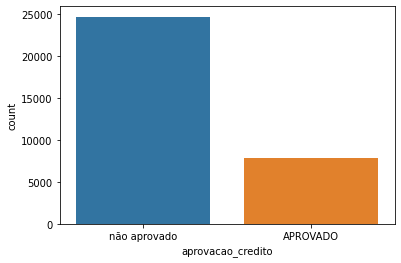

In [14]:
sns.countplot(x = dados['aprovacao_credito']);
             #hue = dados['cliente']);

-Percebe-se que os crédito não aprovados são maiores que os aprovado, visto um resultado normal dentro do modelo do negócio.

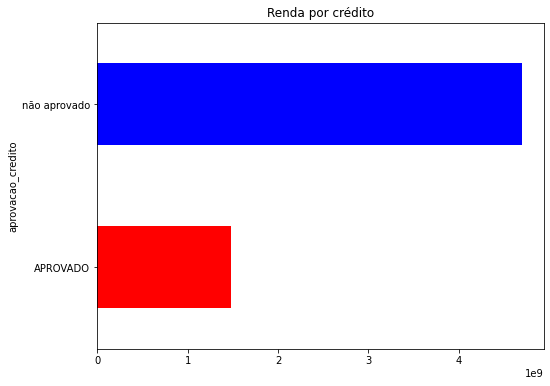

In [15]:
dados.groupby('aprovacao_credito')['renda'].sum().sort_values().plot(kind = 'barh',color=['r','b'] , figsize=(8,6), title="Renda por crédito"); 

-O gráfico acima mostra uma discrepancia entre os créditos não aprovados e aprovados com relação a sumarização da renda,isto significa que na  renda bruta prevalece os créditos não aprovados, logo, existe margem para se aumentar os créditos aos clientes.

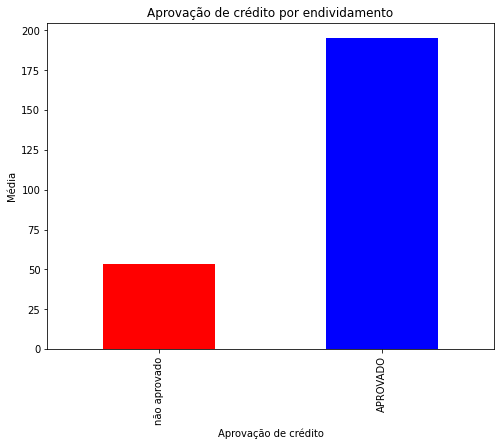

In [16]:
dados.groupby('aprovacao_credito')['endividamento'].mean().sort_values().plot(kind = 'bar',color=['r','b'] ,xlabel='Aprovação de crédito' , ylabel= 'Média'  ,figsize=(8,6),  title="Aprovação de crédito por endividamento"); 

- O gráfico acima apresenta que os créditos aprovados tem uma relação com as médias dos endividamentos,isto significa que existe muito crédito por endividamento, para o negócio talvez seja interessante analisar as duas relações para monitorar o comportamento dos créditos.

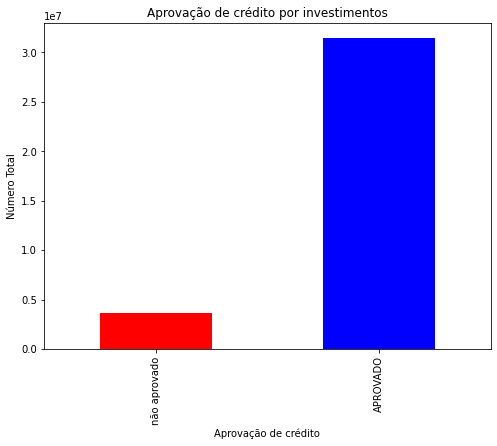

In [17]:
dados.groupby('aprovacao_credito')['investimentos'].sum().sort_values().plot(kind = 'bar', color=['r','b'] , xlabel='Aprovação de crédito' , ylabel= 'Número Total'  ,figsize=(8,6), title="Aprovação de crédito por investimentos"); 

- O gráfico acima retrata que a sumarização dos investimentos é uma consequência dos créditos aprovados,ou seja, quanto mais créditos cedidos aos clientes, mais investimentos ele poderá adquirir

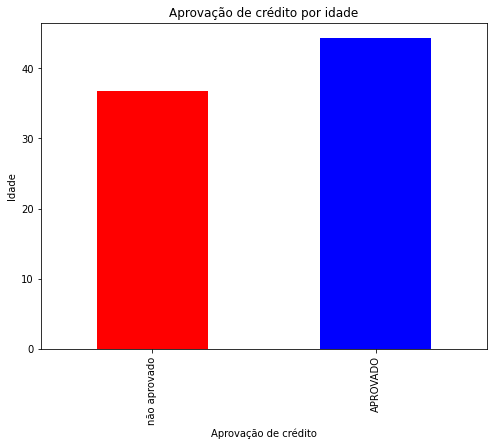

In [18]:
dados.groupby('aprovacao_credito')['idade'].mean().sort_values().plot(kind = 'bar', color=['r','b']   ,  xlabel='Aprovação de crédito' , ylabel= 'Idade'  , figsize=(8,6), title="Aprovação de crédito por idade"); 

- O gráfico da idade por crédito retrata que a média de idade dos créditos aprovados estão na faixa de 44 anos, emquanto que os não aprovados estão na faixa de 36 anos, por se tratar de idades equiparadas, pressupõe que nesta análise, essa faixa de idade não define resultados importantes para definição dos créditos. No entanto, é importante saber a faixa etária â qual o negócio está envolvido.

In [19]:
# Calculando o percentual da classe estado civil
n=dados['estado_civil'].shape[0]
(dados['estado_civil'].value_counts()/n)

Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: estado_civil, dtype: float64

- Aqui pecebe-se que 45% são casados, 32% nunca casou, 13% divorciados e 0,03% viúvos, é interessante saber esse perfil pois quanto maior a composição da familia, existe uma tendência a maiores créditos.

In [20]:
# contagwm dos créditos por estado civil de forma ascendente
dados.groupby('aprovacao_credito')['estado_civil'].value_counts().sort_values(ascending = False)

aprovacao_credito  estado_civil         
não aprovado       Never-married            10192
                   Married-civ-spouse        8284
APROVADO           Married-civ-spouse        6692
não aprovado       Divorced                  3980
                   Separated                  959
                   Widowed                    908
APROVADO           Never-married              491
                   Divorced                   463
não aprovado       Married-spouse-absent      384
APROVADO           Widowed                     85
                   Separated                   66
                   Married-spouse-absent       34
não aprovado       Married-AF-spouse           13
APROVADO           Married-AF-spouse           10
Name: estado_civil, dtype: int64

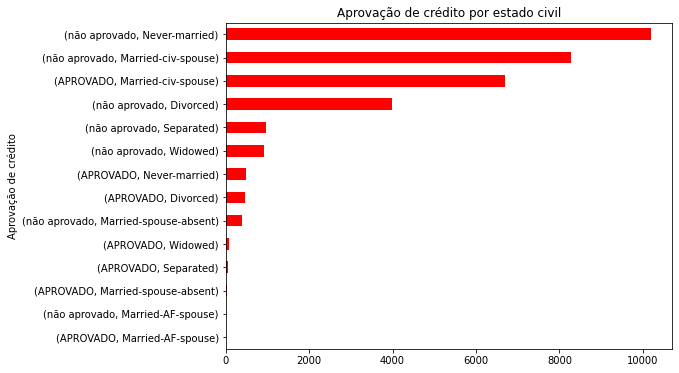

In [21]:
# contagem em percentual dos créditos por estado civil
dados.groupby('aprovacao_credito')['estado_civil'].value_counts().sort_values().plot(kind = 'barh',xlabel='Aprovação de crédito' , ylabel= 'Percentual'  , color='r', figsize=(8,6), title="Aprovação de crédito por estado civil"); 

- O gráfico acima retrata que a maioria dos créditos não aprovados  foram  de clientes que nunca  casou-se ,seguido pelos casados, isto significa que outros fatores mais importatntes que o estado civil determinaram à aprovação do crédito, no entanto, existem créditos aprovados de forma a se considerar para os clientes casados

In [22]:
(dados['empregador'].value_counts()/n).sort_values(ascending=False) #.plot(kind = 'barh', color='r', figsize=(8,6), title="Percentual do tipo de empregador");

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: empregador, dtype: float64

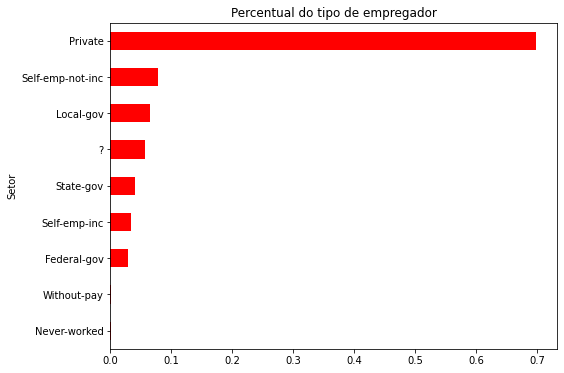

In [23]:
# Verificando a contagem da coluna emprego

(dados['empregador'].value_counts()/n).sort_values() .plot(kind = 'barh', color='r',xlabel='Setor' , ylabel= 'Percentual'  ,figsize=(8,6), title="Percentual do tipo de empregador");


- Quanto ao tipo de emprego,69% é do setor privado, isso significa que a maioria do clientes pode variar a  renda e a estabilidade no emprego, o qual pode aumentar as taxas de juros do crédito devido ao risco ao crédito

In [24]:
dados['education'].value_counts()/n

HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64

Quanto à educação, 32% dos clientes não possui nenhuma graduação, 22% em algum colégio e 16% bacharelado,  ou seja, mais de 25% dos creditos não aprovados refere-se a quem não tem graduação.

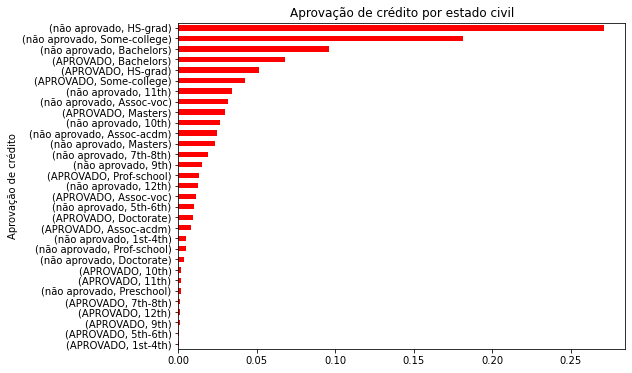

In [25]:
(dados.groupby('aprovacao_credito')['education'].value_counts().sort_values(ascending=True)/n).plot(kind = 'barh', xlabel='Aprovação de crédito' ,color='r', figsize=(8,6), title="Aprovação de crédito por estado civil");


In [26]:
# verificando a quantidade por sexo
dados['sex'].value_counts()


Male      21790
Female    10771
Name: sex, dtype: int64

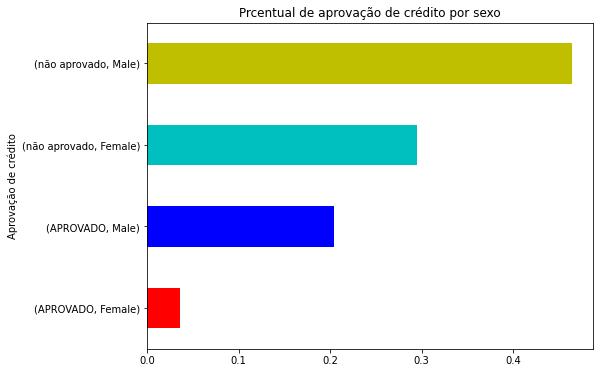

In [27]:
(dados.groupby('aprovacao_credito')['sex'].value_counts()/n).sort_values().plot(kind = 'barh', xlabel='Aprovação de crédito' , ylabel= 'Percentual' ,color=['r','b','c','y']   , figsize=(8,6), title="Prcentual de aprovação de crédito por sexo"); 

- Os dados comprovam que o sexo masculino representa o dobro do sexo feminino.
- Mais de 40% dos créditos não aprovado são masculino, em contrapartida aos 20% aprovados.
- Os créditos não aprovados para o sexo feminino, representa quase 30%, contra aproximadamente mais de 3% aprovado.
- Isso siginifica que existe uma grande diferença de linha de crédito entre os sexos, e que se precisa travalhar a carteira de crédito para o público feminino.
- É preciso reduzir o número de crédito não aprovado para o sexo masculino

## EDA PARA MODELAGEM

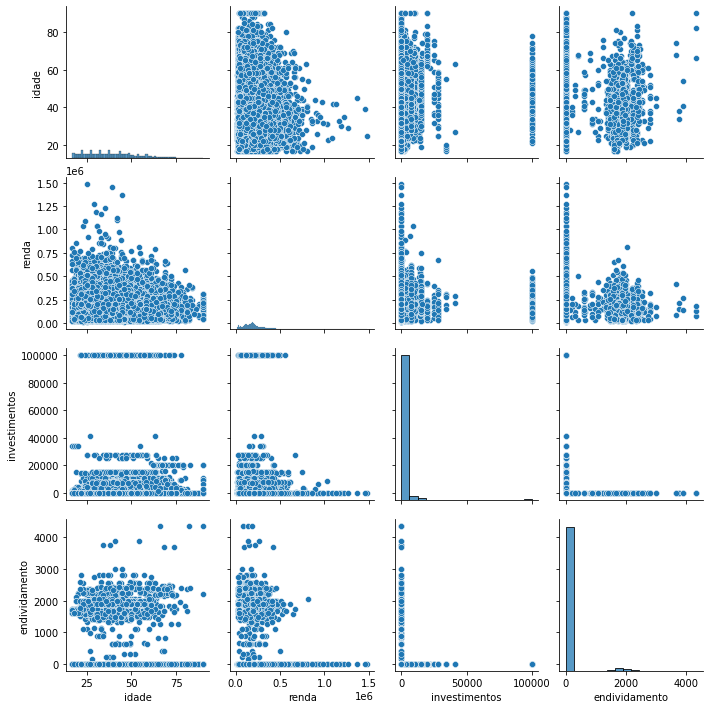

In [28]:
sns.pairplot(dados)

- A medida que a idade aumenta, o endividamento aumentata também;
- Os valores dos investimentos aumentam entre os mais velhos;
- As menores rendas tem maiores endividamentos

###Variáveis Categóricas

In [29]:
 # retornando as variaveis categóricas
 var_cat=['race', 'ocupacao','education','empregador','estado_civil','relacionamento','sex','nacionalidade']
 var_cat

['race',
 'ocupacao',
 'education',
 'empregador',
 'estado_civil',
 'relacionamento',
 'sex',
 'nacionalidade']

### Variáveis Contínuas

In [30]:
 #retornando as variavies continuas
 var_cont=[ 'idade','renda','investimentos','endividamento']
 var_cont

['idade', 'renda', 'investimentos', 'endividamento']

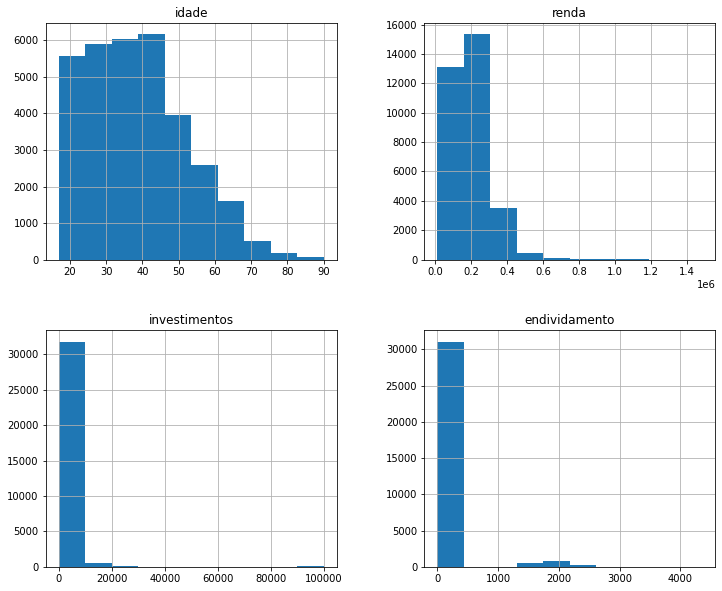

In [31]:
# histigrama das variaveis continuas
dados.hist(figsize=(12,10));

- Existem muitos clientes sem investimentos e sem endividamentos, isso significa que pode ser a de muitas contas abertas mas sem movimentação.

### Visualização das variáveis contínuas em relação à variável target

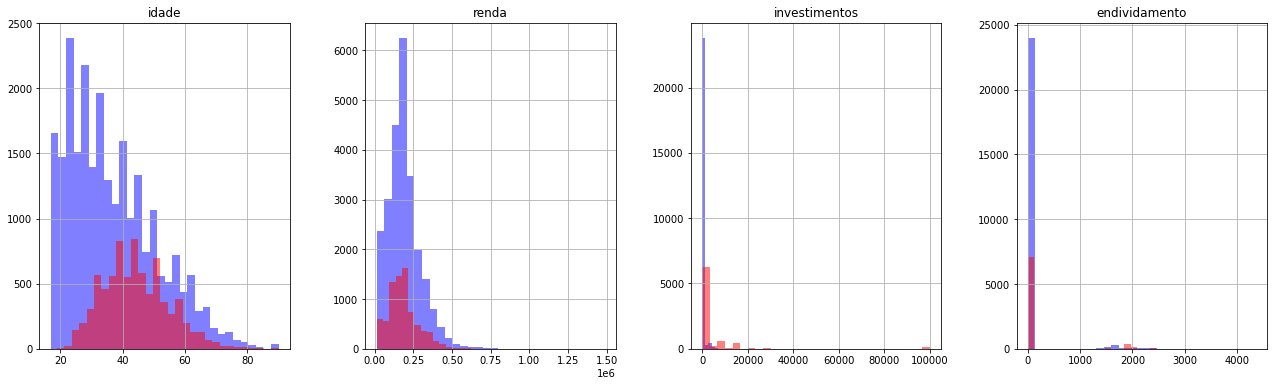

In [32]:
# Visualizando as variáveis continuas em relação à aprovação de créditos
import matplotlib.pyplot as plt 
fig, ax = plt.subplots(1, 4, figsize=(22, 6));
dados[dados.aprovacao_credito == "não aprovado"][var_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
dados[dados.aprovacao_credito == "APROVADO"][var_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

- Aqui percebe-se que aproximadamente abaixo de 40 anos existe uma grande proporção de créditos não aprovados;
- Existem margem para créditos nas menores rendas, e muitos clientes sem investimentos e endividamentos.


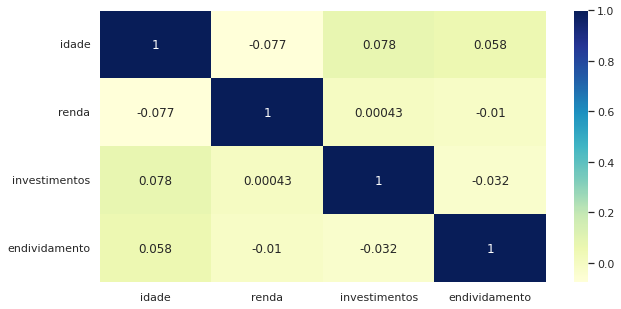

In [33]:
 # definindo mapa de correlação
a=dados.corr( )
sns.set(rc = {'figure.figsize':(10,5)})
sns.heatmap(a, annot=True, cmap="YlGnBu");

- No gráfico das correlações nenhuma variável com relação alta, apenas renda e idade inversamente proporcionais.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

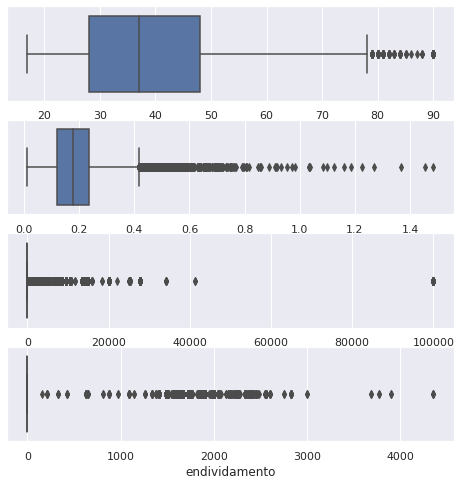

In [34]:
fig, axis = plt.subplots(4,figsize=(8,8)) # identificando outiliers
a= dados[[  'idade','renda','investimentos','endividamento' ]]
for i,column in enumerate(a):
     sns.boxplot(dados[column],ax=axis[i])

- Resolvi manter os autlier pois sua eliminação interfere na variável resposta

# PRÉ - PROCESSAMENTO

Separação das variáveis dependentes e independentes

In [35]:
X=dados.drop('aprovacao_credito', axis=1)
y=dados['aprovacao_credito']



In [36]:
# tRANSFORMANDO A TARGET EM VALOR NÚMERICO
dados['aprovacao_credito']=dados['aprovacao_credito'].replace({'não aprovado':0, 'APROVADO':1})
dados['sex']=dados['sex'].replace({'Male':0, 'Female':1})
dados



,idade,empregador,renda,education,estado_civil,ocupacao,relacionamento,race,sex,investimentos,endividamento,nacionalidade,aprovacao_credito
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,0,2174,0,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,1,0,0,United-States,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,0,0,0,United-States,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,1,0,0,United-States,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,0,0,0,United-States,0


In [37]:
#tratando as classes desbalanceadas
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))


Counter({'não aprovado': 24720, 'APROVADO': 24720})


In [38]:
# Tratando as variáveis categóricas em números
df= pd.get_dummies(X_over) 
df2=pd.get_dummies(y_over,drop_first = True) 



In [39]:
# padronizando a variavel idade
media = np.mean(df['idade'])
desvio = np.std(df['idade'])

df['idade'] = (df['idade'] - media)/desvio


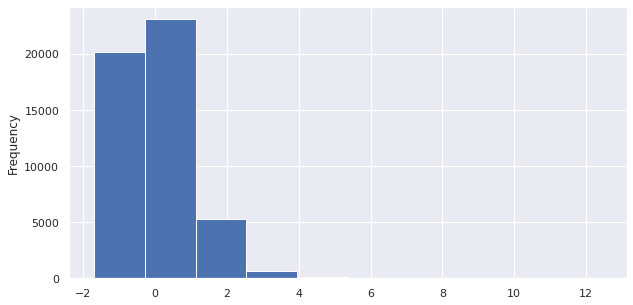

In [40]:
# Padronizando a variável renda
media = np.mean(df['renda'])
desvio = np.std(df['renda'])

a=df['renda'] = (df['renda'] - media)/desvio

a.plot(kind = 'hist', edgecolor = 'white');

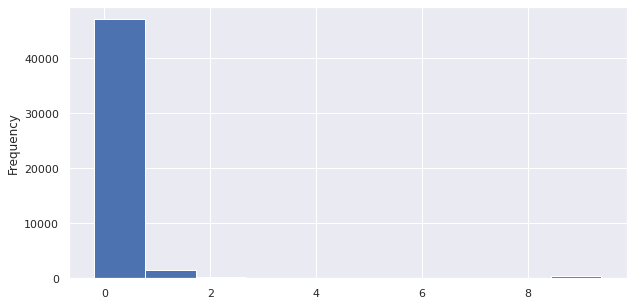

In [41]:
# Padronizando a variável investimentos
media = np.mean(df['investimentos'])
desvio = np.std(df['investimentos'])

a=df['investimentos'] = (df['investimentos'] - media)/desvio

a.plot(kind = 'hist', edgecolor = 'white');

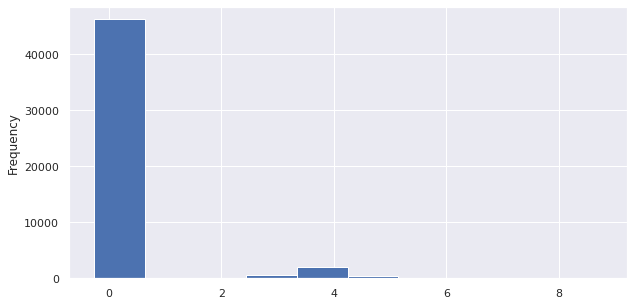

In [42]:
# Padronizando a variável investimentos
media = np.mean(df['endividamento'])
desvio = np.std(df['endividamento'])

a=df['endividamento'] = (df['endividamento'] - media)/desvio

a.plot(kind = 'hist', edgecolor = 'white');

In [43]:
# verificando o dataset
df

,idade,renda,investimentos,endividamento,empregador_?,empregador_Federal-gov,empregador_Local-gov,empregador_Never-worked,empregador_Private,empregador_Self-emp-inc,...,nacionalidade_Portugal,nacionalidade_Puerto-Rico,nacionalidade_Scotland,nacionalidade_South,nacionalidade_Taiwan,nacionalidade_Thailand,nacionalidade_Trinadad&Tobago,nacionalidade_United-States,nacionalidade_Vietnam,nacionalidade_Yugoslavia
0,-0.118388,-1.066427,0.011207,-0.260185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.730864,-1.010879,-0.197207,-0.260185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.195593,0.257625,-0.197207,-0.260185,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.962478,0.440470,-0.197207,-0.260185,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.967640,1.434377,-0.197207,-0.260185,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49435,-1.122050,-0.010713,-0.197207,-0.260185,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
49436,1.194092,-0.668119,-0.197207,-0.260185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
49437,1.425706,-0.116202,-0.197207,-0.260185,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
49438,-1.044845,-0.776023,-0.197207,-0.260185,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## MODELAGEM

In [44]:
# modelagem
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
 KNeighborsClassifier)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# métricas de validação
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# validação cruzada


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate



##### OBS: DEPOIS DO BALANCEAMENTO DAS VARIÁVEIS FEITA DO PRÉPROCESSAMENTO, A VARÁVEL 'X' FICOU COMO 'DF', E A VARIÁVEL 'Y' FICOU COM DF2.

- Criando uma lista de medidas

In [45]:
Xtreino, Xteste, ytreino, yteste  = train_test_split(df, df2, test_size = 0.25)
    

In [46]:
# criando uma lista de medidas
lista_de_medidas = ['accuracy', 'recall', 'precision', 'balanced_accuracy',
                    'f1']
nome_das_medidas = ['acurácia', 'sensibilidade', 'precisão', 'eficiência',
                    'f1-score']

- Criando uma lista de modelos

In [47]:
# criando uma lista de modelos
lista_de_modelos = [LogisticRegression(),
                        DecisionTreeClassifier(max_depth = 3),
                        DecisionTreeClassifier(max_depth = 5),
                        DecisionTreeClassifier(max_depth = 7),
                        DecisionTreeClassifier(max_depth = 9),
                        DecisionTreeClassifier(max_depth = 11),
                        DecisionTreeClassifier(max_depth = 13),
                        DecisionTreeClassifier(max_depth = 15),
                        KNeighborsClassifier(n_neighbors = 5),
                        KNeighborsClassifier(n_neighbors = 15),
                        KNeighborsClassifier(n_neighbors = 25),
                        KNeighborsClassifier(n_neighbors = 35),
                        KNeighborsClassifier(n_neighbors = 45),
                        KNeighborsClassifier(n_neighbors = 55),
                        BaggingClassifier(),
                        RandomForestClassifier(n_estimators=50, max_depth = 5),
                        RandomForestClassifier(n_estimators=50, max_depth = 7),
                        RandomForestClassifier(n_estimators=50, max_depth = 9),
                        RandomForestClassifier(n_estimators=50, max_depth = 11),
                        RandomForestClassifier(n_estimators=50, max_depth = 13),
                        RandomForestClassifier(n_estimators=50, max_depth = 15),
                        RandomForestClassifier(n_estimators=100, max_depth = 5),
                        RandomForestClassifier(n_estimators=100, max_depth = 7),
                        RandomForestClassifier(n_estimators=100, max_depth = 9),
                        RandomForestClassifier(n_estimators=100, max_depth = 11),
                        RandomForestClassifier(n_estimators=100, max_depth = 13),
                        RandomForestClassifier(n_estimators=100, max_depth = 15), XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=6)]

nome_dos_modelos = ['Regressão Logística',
                        'Árvore (prof = 3)',
                        'Árvore (prof = 5)',
                        'Árvore (prof = 7)',
                        'Árvore (prof = 9)',
                        'Árvore (prof = 11)',
                        'Árvore (prof = 13)',
                        'Árvore (prof = 15)',
                        '5-NN',
                        '15-NN',
                        '25-NN',
                        '35-NN',
                        '45-NN',
                        '55-NN',
                        'Bagging',
                        'Random Forest (arvs = 50, prof = 5)',
                        'Random Forest (arvs = 50, prof = 7)',
                        'Random Forest (arvs = 50, prof = 9)',
                        'Random Forest (arvs = 50, prof = 11)',
                        'Random Forest (arvs = 50, prof = 13)',
                        'Random Forest (arvs = 50, prof = 15)',
                        'Random Forest (arvs = 100, prof = 5)',
                        'Random Forest (arvs = 100, prof = 7)',
                        'Random Forest (arvs = 100, prof = 9)',
                        'Random Forest (arvs = 100, prof = 11)',
                        'Random Forest (arvs = 100, prof = 13)',
                        'Random Forest (arvs = 100, prof = 15)',
                        'Gradiente boost' ]

Vamos executar os mesmos e verificar seus resultados.

Nessa primeira parte estamos usando o método de cross-(validation Stratified do KFold).

In [48]:
resultados0 = {}

validacao_skf = StratifiedKFold(n_splits = 10)


for i in range(len(lista_de_modelos)):
    print('Rodando modelo: ' + nome_dos_modelos[i])
    accs_vc = cross_validate(lista_de_modelos[i], df, df2, cv = validacao_skf,
                             scoring = lista_de_medidas)

    acc = accs_vc['test_accuracy'].mean()
    sen = accs_vc['test_recall'].mean()
    vpp = accs_vc['test_precision'].mean()
    bac = accs_vc['test_balanced_accuracy'].mean()
    f1s = accs_vc['test_f1'].mean()

    resultados0[nome_dos_modelos[i]] = [acc, sen, vpp, f1s, bac]
    
resultados = pd.DataFrame(resultados0, index = nome_das_medidas).T

Rodando modelo: Regressão Logística


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

Rodando modelo: Árvore (prof = 3)
Rodando modelo: Árvore (prof = 5)
Rodando modelo: Árvore (prof = 7)
Rodando modelo: Árvore (prof = 9)
Rodando modelo: Árvore (prof = 11)
Rodando modelo: Árvore (prof = 13)
Rodando modelo: Árvore (prof = 15)
Rodando modelo: 5-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: 15-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: 25-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: 35-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: 45-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: 55-NN


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Rodando modelo: Bagging


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Rodando modelo: Random Forest (arvs = 50, prof = 5)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 50, prof = 7)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 50, prof = 9)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 50, prof = 11)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 50, prof = 13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 50, prof = 15)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 5)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 7)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 9)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 11)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 13)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Random Forest (arvs = 100, prof = 15)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

Rodando modelo: Gradiente boost


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), fo

In [49]:
# Buscando os resultados dos modelos
resultados.sort_values(by = 'f1-score', ascending = False)

,acurácia,sensibilidade,precisão,eficiência,f1-score
Bagging,0.921258,0.854976,0.986021,0.915708,0.921258
Gradiente boost,0.894256,0.853600,0.929342,0.889807,0.894256
Árvore (prof = 15),0.848888,0.799150,0.887802,0.840972,0.848888
"Random Forest (arvs = 100, prof = 15)",0.848402,0.771440,0.911848,0.835759,0.848402
"Random Forest (arvs = 50, prof = 15)",0.847249,0.771359,0.909420,0.834702,0.847249
Árvore (prof = 13),0.838997,0.792031,0.874713,0.830996,0.838997
5-NN,0.838289,0.768244,0.893852,0.826175,0.838289
"Random Forest (arvs = 50, prof = 13)",0.834830,0.756715,0.896842,0.820835,0.834830
"Random Forest (arvs = 100, prof = 13)",0.834324,0.756958,0.895581,0.820435,0.834324
Árvore (prof = 11),0.826355,0.775162,0.864233,0.816917,0.826355


- Irei rodar alguns modelos com ( kfoldrepetido ) para comparar alguns modelos que não ficaram no topo da lista

In [50]:
# Aplicando a validação cruzada kfold-repetido
validacao_rkf = RepeatedKFold(n_splits = 10, n_repeats = 100)

REGRESSÃO LOGISTICA

In [51]:
# APLICANDO A REGRESSÃO LOGISTICA
modelo_LR = LogisticRegression() 
medidas_LR = cross_validate(modelo_LR, df, df2, cv = validacao_rkf, scoring = 'f1')
medidas_LR['test_score'].mean()

A saída de streaming foi truncada nas últimas 5000 linhas.
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

0.8139240346694048

RANDOM FOREST

In [52]:
modelo_RF50_13 = RandomForestClassifier(n_estimators=50, max_depth = 13)
medidas_RF50_13 = cross_validate(modelo_RF50_13, df, df2, cv = validacao_rkf,
                                 scoring = 'f1')
medidas_RF50_13['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 

0.8198867966077805

BAGGING

In [53]:
 Bagging= BaggingClassifier()
 medidas_Bagging= cross_validate( Bagging, df, df2, cv = validacao_rkf,
                                    scoring = 'f1')
 medidas_Bagging['test_score'].mean()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

0.913391721386147

ÁRVORE DE DECISÃO

In [54]:
 modelo_ARV_13= DecisionTreeClassifier(max_depth = 13)
 medidas_ARV_13 = cross_validate(modelo_ARV_13 , df, df2, cv = validacao_rkf,
                                 scoring = 'f1')
 medidas_ARV_13['test_score'].mean()



0.8303466932332513

In [55]:
  KNN_55 = KNeighborsClassifier(n_neighbors = 55)
  medidas_55_KNN = cross_validate( KNN_55, df, df2, cv = validacao_rkf,
                                 scoring = 'f1')
  print(medidas_55_KNN['test_score'].mean())

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

0.8014849594903437


OBS: Nenhum dos modelos acima  no kfoldrepetido superou os dos kfoldstratificados, sendo assim, combinarei alguns modelos do kfoldstratificados para verificação se haverá melhora no desempenho.

## O melhor modelo definido

In [56]:
#Treinando modelo escolhido
Bagging = BaggingClassifier( )
Bagging.fit(Xtreino,ytreino) # meu X,y foi substituido por df e df2


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BaggingClassifier()

In [57]:
# avaliando modelo nos dados testes

preditos = Bagging.predict(Xteste)
preditos


array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

- A quantidade de créditos aprovado e não aprovado (verdadeiros positivos e negativos( tem uma acertividade alta, como o objetivo é medir a quantidade de crédito não aprovados, tivemos precisão de 85%  e 90% de acurácia. Vale ressaltar que todas métricas passa confiabilidade nos resultados.

In [58]:
# Observando o total das previsões
print(pd.crosstab(yteste['não aprovado'],preditos, rownames=['Real'], colnames=['Preditos_da_máquina'], margins=True))

Preditos_da_máquina     0     1    All
Real                                  
0                    6049   165   6214
1                     914  5232   6146
All                  6963  5397  12360


In [59]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(yteste, preditos))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6214
           1       0.97      0.85      0.91      6146

    accuracy                           0.91     12360
   macro avg       0.92      0.91      0.91     12360
weighted avg       0.92      0.91      0.91     12360



Probabilidades dos créditos não aprovados para dados de treino

In [60]:
# Cálculos das probabiçidades dos créditos não aprovados
df['proba'] = Bagging.predict_proba(df[Xtreino.columns])[:,0]
df['proba']

0        0.0
1        0.2
2        0.0
3        0.3
4        0.3
        ... 
49435    1.0
49436    1.0
49437    1.0
49438    1.0
49439    1.0
Name: proba, Length: 49440, dtype: float64

## COMBINAÇÃO DE MODELOS

- Aqui combinaremos o segundo(GB) e o terceiro(RF100_15) melhores modelos para analisar os resultados, e observar se supera alguns indicadores. A metodologia será a 'soft'

In [67]:
from sklearn.ensemble import VotingClassifier # importando biblioteca para classificalção

In [68]:
# treinando a combinaçõo dos modelos
RF_100_15=RandomForestClassifier(n_estimators=100, max_depth = 15)
XB= XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=6)
voto = VotingClassifier(estimators=[('RF',RF_100_15 ),('xgb',XB)], voting='soft')
voto = voto.fit(Xtreino,ytreino)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [69]:
preditos = voto.predict(Xteste)
print(pd.crosstab(yteste['não aprovado'],preditos, rownames=['Real'], colnames=['Preditos_da_máquina'], margins=True)) 



Preditos_da_máquina     0     1    All
Real                                  
0                    5762   452   6214
1                     995  5151   6146
All                  6757  5603  12360


In [70]:
print(classification_report(yteste, preditos))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      6214
           1       0.92      0.84      0.88      6146

    accuracy                           0.88     12360
   macro avg       0.89      0.88      0.88     12360
weighted avg       0.89      0.88      0.88     12360



OBS: todos indicadores que mede a classe 0 =( não créditos) foram inferiores ao melhor modelo, porém, esta combinação é considerado um bom modelo para o objettivo proposto. logo ficaremos com o modelo Bagging.





#* SALVANDO O MELHOR MODELO*

In [65]:
# importando biblioteca joblib para salvar o modelo
import joblib
model_name = "modelo_prev_cred.pkl"
joblib.dump(value=Bagging, filename=model_name)

['modelo_prev_cred.pkl']

## CONSIDERAÇÕES FINAIS

-  Quanto à análise exploratória alguns dados se mostram relevantes:

 1 Existem  uma discrepância normal entre os créditos não aprovados e aprovados, sua relação com a renda pressuõe uma margem de crescimento entre os não aprovados.

 2 Os créditos aprovados têm uma relação direta com os endividamentos e quanto maiores os créditos aprovados, maiores são os investmentos.
 
 3 A faixa etária dos clientes estão em média de 44 anos, e não interfere para aprovação do crédito, quanto ao gênero, o masculino é a maioria dos clientes (chegando a ser o dobro) com 20% dos créditos aprovados, enquanto o feminino apenas 3%. Isso pressupõe margem de crescimento nos gêneros em especial o feminino.

 4.Quanto à escolarização, 32% dos clientes não possui nenhuma graduação, 22% em algum colégio e 16% bacharelado, e mais de 25% dos creditos não aprovados refere-se a quem não tem graduação.
 
 5.Quanto ao estado civil, 45% são casados, 32% nunca casou, 13% divorciados e 0,03% viúvos, é interessante saber esse perfil pois quanto maior a composição da familia, existe uma tendência a maiores créditos tanto no valor quanto à necessidades.

 6.
   Quanto ao tipo de emprego, 69% é do setor privado, isso significa que a maioria do clientes pode variar a renda e a estabilidade no emprego, o qual pode aumentar as taxas de juros do crédito devido aos riscos envolvidos
- Quanto  ao modelo escolhido dado o objetivo de prever os créditos não aprovados, foi escolhido o bagging por uma acuracidade de 91%, precisão de acerto de 87%, levando em consideração que todas métricas levaram ao resultado para o melhor modelo.
- Apesar do objetvo 'prever os créditos não aprovados', o modelo prever também os aprovados.
- É importante frisar que os outros modelos testados como: Gradienteboost e a combinado por voto são modelos considerdos de ótimos resultados para os objetivos proposto.
 